C:\Users\Indra\AppData\Local\Temp\ipykernel_25804\1909976639.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(r"D:\Stock_prediction\data_ingestion\stock_data.csv", parse_dates=True, index_col='Date')


ADF Statistic: 1.8872058974973187
p-value: 0.9985071550575835
The series is not stationary.
ADF Statistic: -20.482253647824905
p-value: 0.0
The series is stationary.


C:\Users\Indra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Indra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Indra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Indra\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

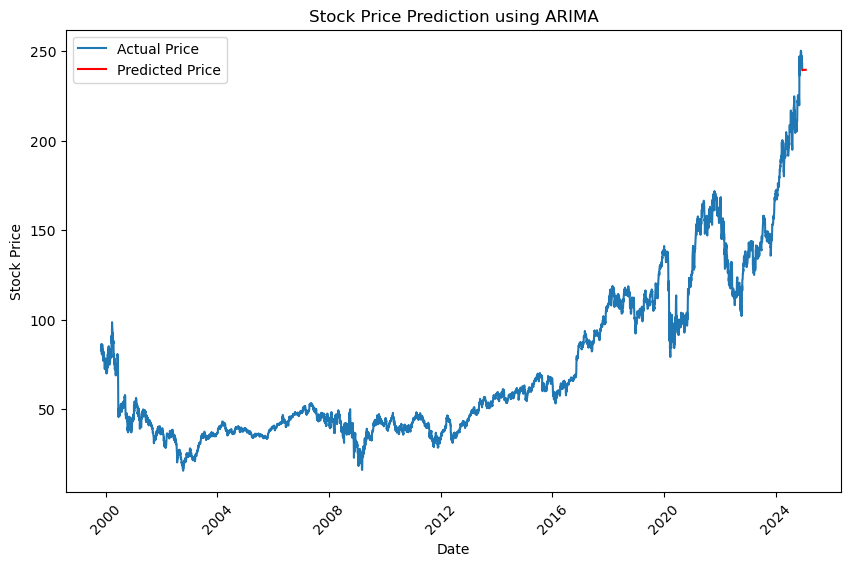

Forecasted Prices for the next 30 business days (starting from 17-12-2024):
2024-12-17: 239.53
2024-12-18: 239.57
2024-12-19: 239.56
2024-12-20: 239.58
2024-12-23: 239.58
2024-12-24: 239.57
2024-12-25: 239.58
2024-12-26: 239.58
2024-12-27: 239.60
2024-12-30: 239.58
2024-12-31: 239.60
2025-01-01: 239.59
2025-01-02: 239.60
2025-01-03: 239.60
2025-01-06: 239.60
2025-01-07: 239.60
2025-01-08: 239.60
2025-01-09: 239.61
2025-01-10: 239.61
2025-01-13: 239.61
2025-01-14: 239.61
2025-01-15: 239.61
2025-01-16: 239.61
2025-01-17: 239.61
2025-01-20: 239.61
2025-01-21: 239.61
2025-01-22: 239.61
2025-01-23: 239.61
2025-01-24: 239.62
2025-01-27: 239.62


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv(r"D:\Stock_prediction\data_ingestion\stock_data.csv", parse_dates=True, index_col='Date')

df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names

# Ensure data is sorted by Date in case it's not ordered
df = df.sort_index()

# Check for stationarity with ADF test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Check the stationarity of the 'close' price
adf_test(df['close'])

# If the series is not stationary, apply differencing
df['close_diff'] = df['close'].diff().dropna()

# Re-check stationarity of differenced series
adf_test(df['close_diff'].dropna())

# Fit ARIMA model (use (p,d,q) parameters based on ACF and PACF plots)
# ARIMA (p, d, q) model parameters: p = autoregressive lags, d = differencing order, q = moving average lags
model = ARIMA(df['close'], order=(5, 1, 5))  # Adjust parameters as needed
model_fit = model.fit()

# Make predictions for the next 30 days starting from 17-12-2024
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future date range starting from 17-12-2024
forecast_dates = pd.date_range(start='17-12-2024', periods=forecast_steps, freq='B')  # 'B' stands for business days

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Actual Price')
plt.plot(forecast_dates, forecast, label='Predicted Price', color='red')
plt.title('Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print forecasted values
print(f"Forecasted Prices for the next {forecast_steps} business days (starting from 17-12-2024):")
for date, price in zip(forecast_dates, forecast):
    print(f"{date.date()}: {price:.2f}")
